# Análisis de Riesgo: Variables Categóricas vs Stroke 🧠

En este notebook, evaluaremos el impacto real de cada categoría en el riesgo de sufrir un infarto. Utilizaremos visualizaciones de proporciones normalizadas para identificar qué grupos presentan una mayor vulnerabilidad clínica.

### **1. Preparación del Entorno**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset limpio
df = pd.read_csv('dataset/healthcare-dataset-stroke-clean.csv')

# Configuramos el estilo
sns.set_theme(style="white")

### **2. Función de Visualización Profesional**
Para no repetir código, crearemos una función que genere el gráfico de barras apiladas al 100% con los porcentajes visibles.

In [3]:
def plot_stacked_risk(df, column):
    # Crear tabla de contingencia normalizada (proporciones)
    ct = pd.crosstab(df[column], df['stroke'], normalize='index') * 100
    
    # Configurar el gráfico
    ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 color=['#2c3e50', '#e74c3c'], width=0.8)
    
    plt.title(f'Proporción de Riesgo por {column.capitalize()}', fontsize=14, fontweight='bold')
    plt.xlabel(column.capitalize())
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='Stroke', labels=['No (0)', 'Sí (1)'], loc='upper right')
    plt.xticks(rotation=45)
    
    # Añadir las etiquetas de porcentaje dentro de las barras
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        if height > 2: # Solo mostrar si el porcentaje es significativo
            ax.text(x + width/2, y + height/2, f'{height:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')

    plt.tight_layout()
    plt.show()

### **3. Ejecución del Análisis de Riesgo**
Ahora aplicamos la función a todas tus variables para comparar.

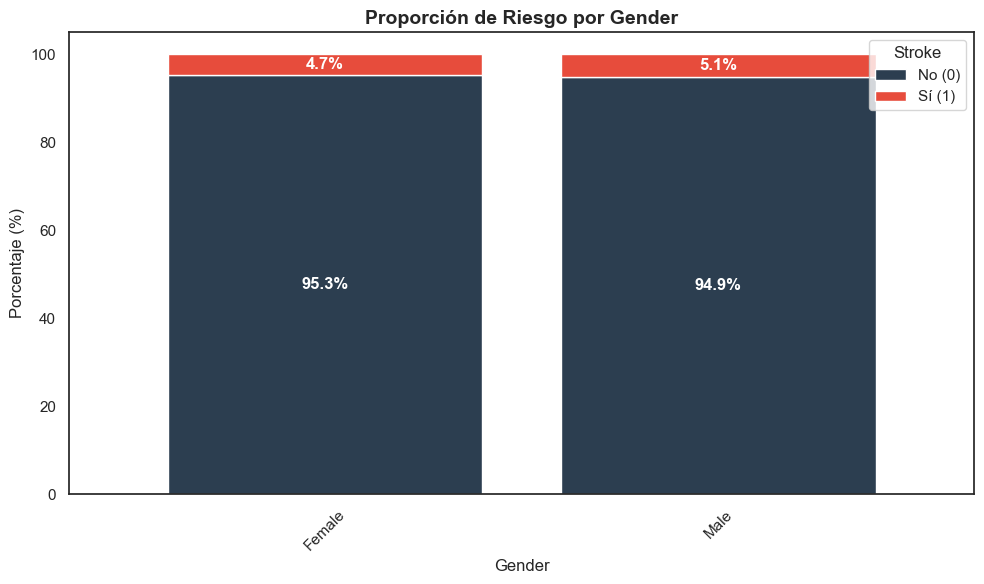

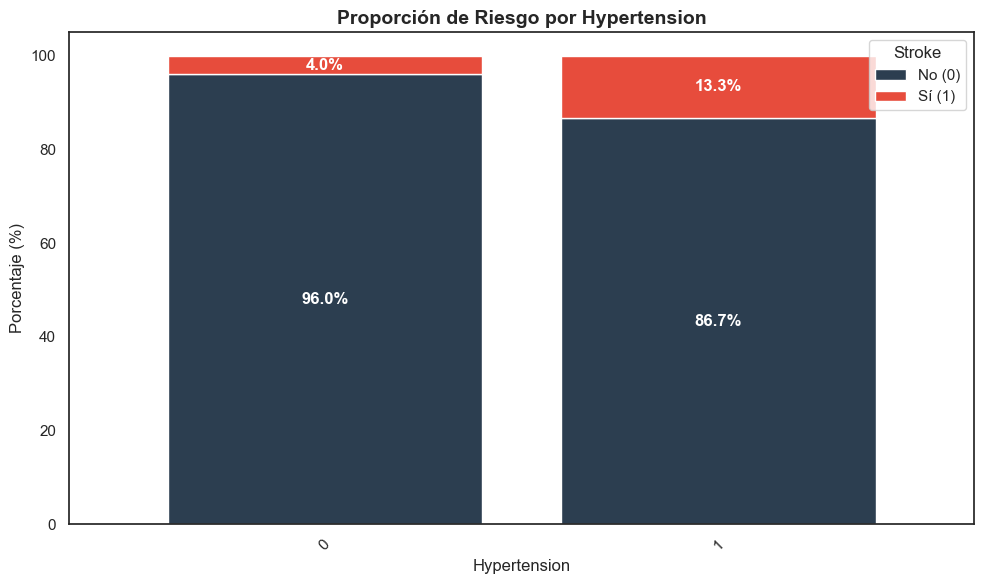

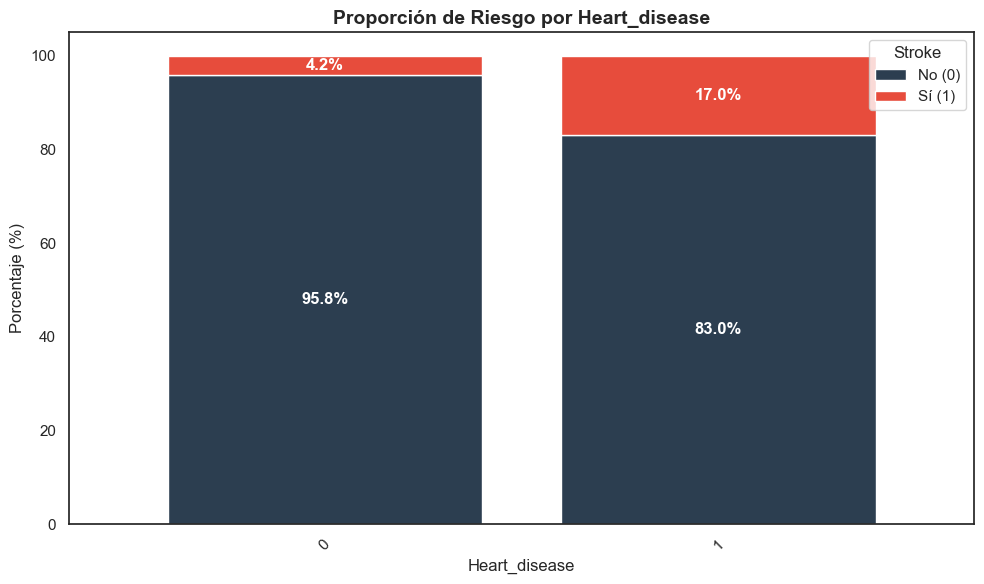

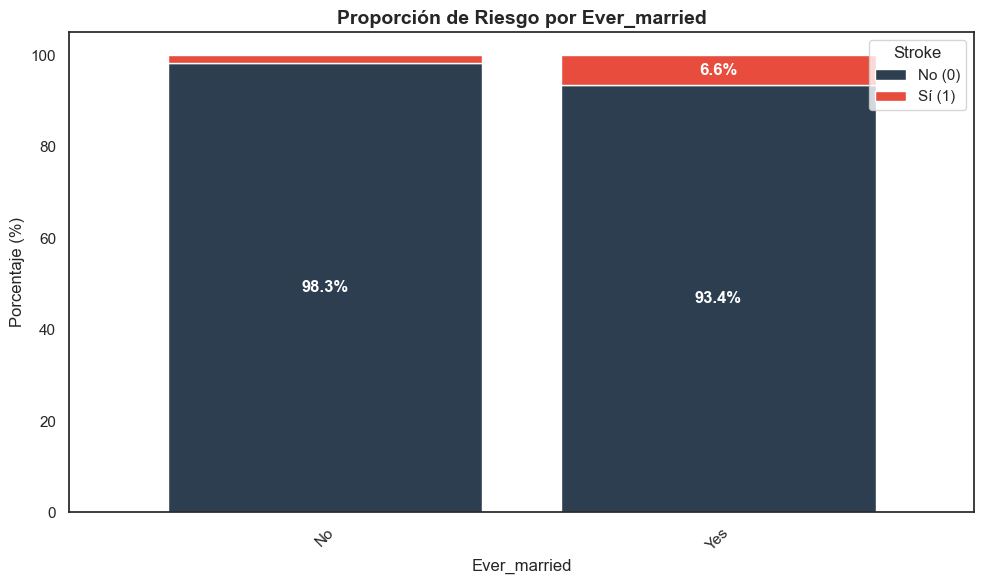

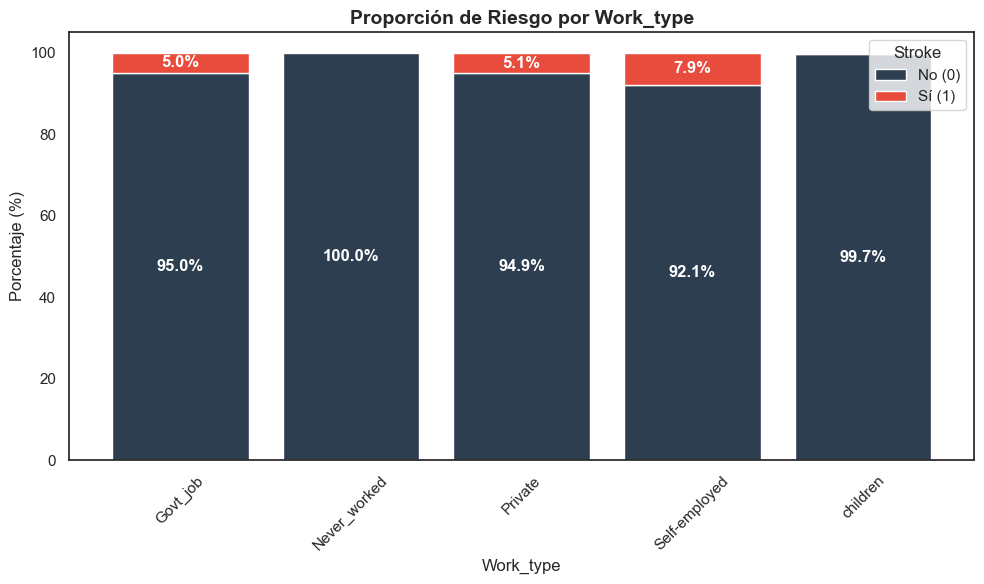

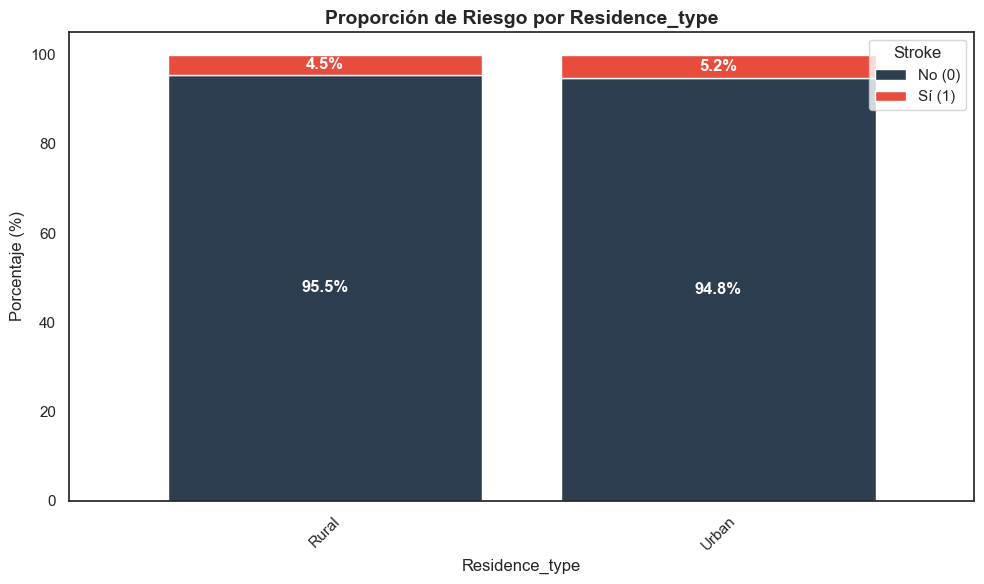

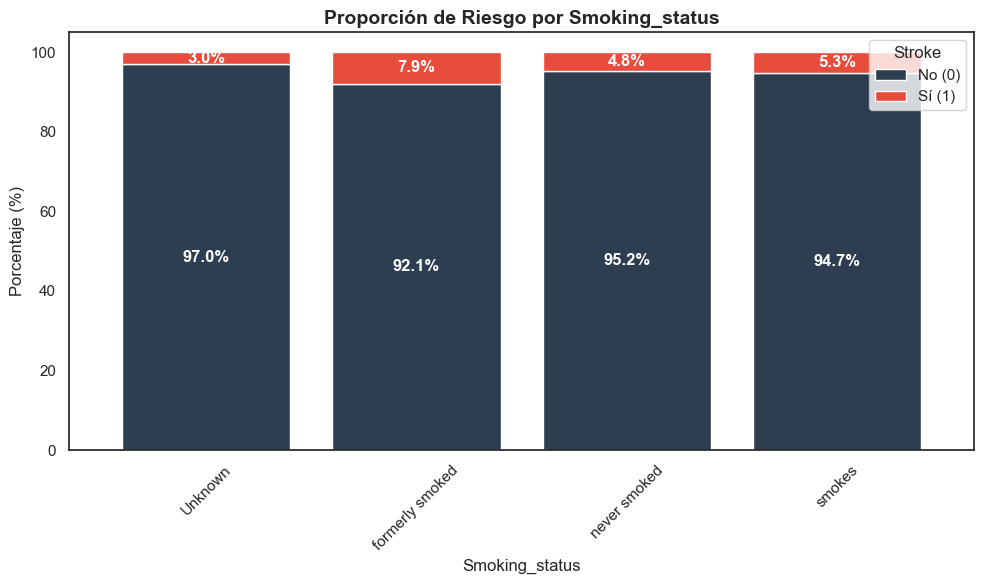

In [4]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plot_stacked_risk(df, col)

# **Conclusiones: Análisis de Riesgo (Variables Categóricas vs Stroke) 🧠**

Tras evaluar el impacto real de cada categoría mediante visualizaciones de proporciones normalizadas (gráficos de barras apiladas al 100%), se han obtenido las siguientes conclusiones clave sobre la vulnerabilidad clínica:

### 1. Indicadores de Mayor Riesgo Clínico
* **Hipertensión y Enfermedades Cardíacas**: Los pacientes con estas condiciones muestran una proporción significativamente mayor de casos de 'stroke' en comparación con quienes no las padecen.
* **Estado Civil**: Se observa un mayor porcentaje de infartos en el grupo de personas que han estado casadas (`ever_married`), lo cual podría estar correlacionado indirectamente con la edad.
* **Tipo de Trabajo**: Las personas con empleos en el sector privado o que trabajan por cuenta propia (`Self-employed`) presentan una mayor incidencia visual de riesgo frente a otros grupos laborales.

### 2. Variables con Impacto Menor o Equilibrado
* **Género y Residencia**: Las variables de género (`gender`) y tipo de residencia (`Residence_type`) muestran distribuciones de riesgo muy similares entre sus categorías, sugiriendo un impacto menos determinante de forma aislada.
* **Tabaquismo**: Aunque el grupo de fumadores muestra riesgo, la categoría de "ex-fumadores" (`formerly smoked`) también presenta una proporción considerable de casos.

### 3. Metodología de Visualización
* **Normalización**: El uso de tablas de contingencia normalizadas al 100% permitió compensar visualmente el fuerte desbalanceo de la variable objetivo detectado en el primer análisis.
* **Umbral de Significancia**: Se implementaron etiquetas de datos solo en segmentos de barra superiores al 2% para asegurar la claridad en la interpretación de los grupos de riesgo más pequeños.

### 4. Consideración Final
* Este análisis de proporciones confirma que ciertas condiciones clínicas preexistentes (hipertensión y problemas cardíacos) son los predictores categóricos con mayor peso visual en la base de datos para identificar la vulnerabilidad ante un infarto cerebral.